In [138]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import *
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.utils import shuffle
import xgboost

In [139]:
data = pd.read_csv('HepatitisCdata.csv', delimiter=',',index_col='Unnamed: 0')
#data.loc[data['Sex']=='m', 'Sex']= 0
#data.loc[data['Sex']=='f', 'Sex']= 1
data['Sex']= data['Sex'].replace(['m','f'],[0,1])
np.unique(data['Sex'], return_counts=True)
377/(377+238)
data


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3=Cirrhosis,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3=Cirrhosis,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,3=Cirrhosis,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,3=Cirrhosis,46,1,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [140]:
#data.fillna(data.median(),inplace= True)
data = data.loc[data['ALP'].notnull(), ['Category','Age','Sex','ALB','ALP', 'ALT','AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]
data = data.loc[data['ALB'].notnull(), ['Category','Age','Sex','ALB','ALP', 'ALT','AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]
data = data.loc[data['ALT'].notnull(), ['Category','Age','Sex','ALB','ALP', 'ALT','AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]
data = data.loc[data['CHOL'].notnull(), ['Category','Age','Sex','ALB','ALP', 'ALT','AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]
data = data.loc[data['PROT'].notnull(), ['Category','Age','Sex','ALB','ALP', 'ALT','AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 1 to 613
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  589 non-null    object 
 1   Age       589 non-null    int64  
 2   Sex       589 non-null    int64  
 3   ALB       589 non-null    float64
 4   ALP       589 non-null    float64
 5   ALT       589 non-null    float64
 6   AST       589 non-null    float64
 7   BIL       589 non-null    float64
 8   CHE       589 non-null    float64
 9   CHOL      589 non-null    float64
 10  CREA      589 non-null    float64
 11  GGT       589 non-null    float64
 12  PROT      589 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 64.4+ KB


In [141]:
name = ['ALB', 'ALT', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']



In [142]:
#metrics = cross_val_score(model, XTest, yTest, cv=KFold(n_splits=10, shuffle=True, random_state=0))
#metrics.mean()

In [143]:
#[0.7808038075092544, ['ALB', 'ALP', 'ALT', 'AST', 'CREA', 'PROT']] 4
#[0.8066631411951348, ['ALB', 'ALT', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']] svm.SVC() rbf
#[0.7937599153886833, ['Age', 'AST', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']] poly
#
#
#
#
#

In [144]:
name = ['ALB', 'ALT', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
y = data['Sex']
#y.loc[y['Sex']=='m', 'Sex']= 0
#y.loc[y['Sex']=='f', 'Sex']= 1
X = data.loc[:, name]


In [145]:
model= svm.SVC(kernel='rbf')
#model = xgboost.XGBClassifier()
model.fit(X,y)

SVC()

In [146]:
#metrics = cross_val_score(model, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=0))
prediction = model_selection.cross_val_predict(model, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=0))
metrics.roc_auc_score(y,prediction)

0.7842767985567664

In [147]:
#metrics.mean()

In [148]:
#data.loc[data['Sex']=='m', 'Sex']= 0
#data.loc[data['Sex']=='f', 'Sex']= 1

C:\Users\Павел\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:244: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


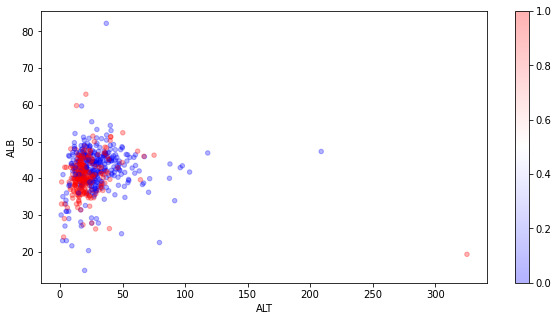

In [149]:
fig, axes = plt.subplots(figsize= [10,5])
data.plot(x='ALT',y='ALB',kind='scatter',color=data['Sex'],cmap= 'bwr',alpha = 0.3 ,ax=axes)

plt.show()

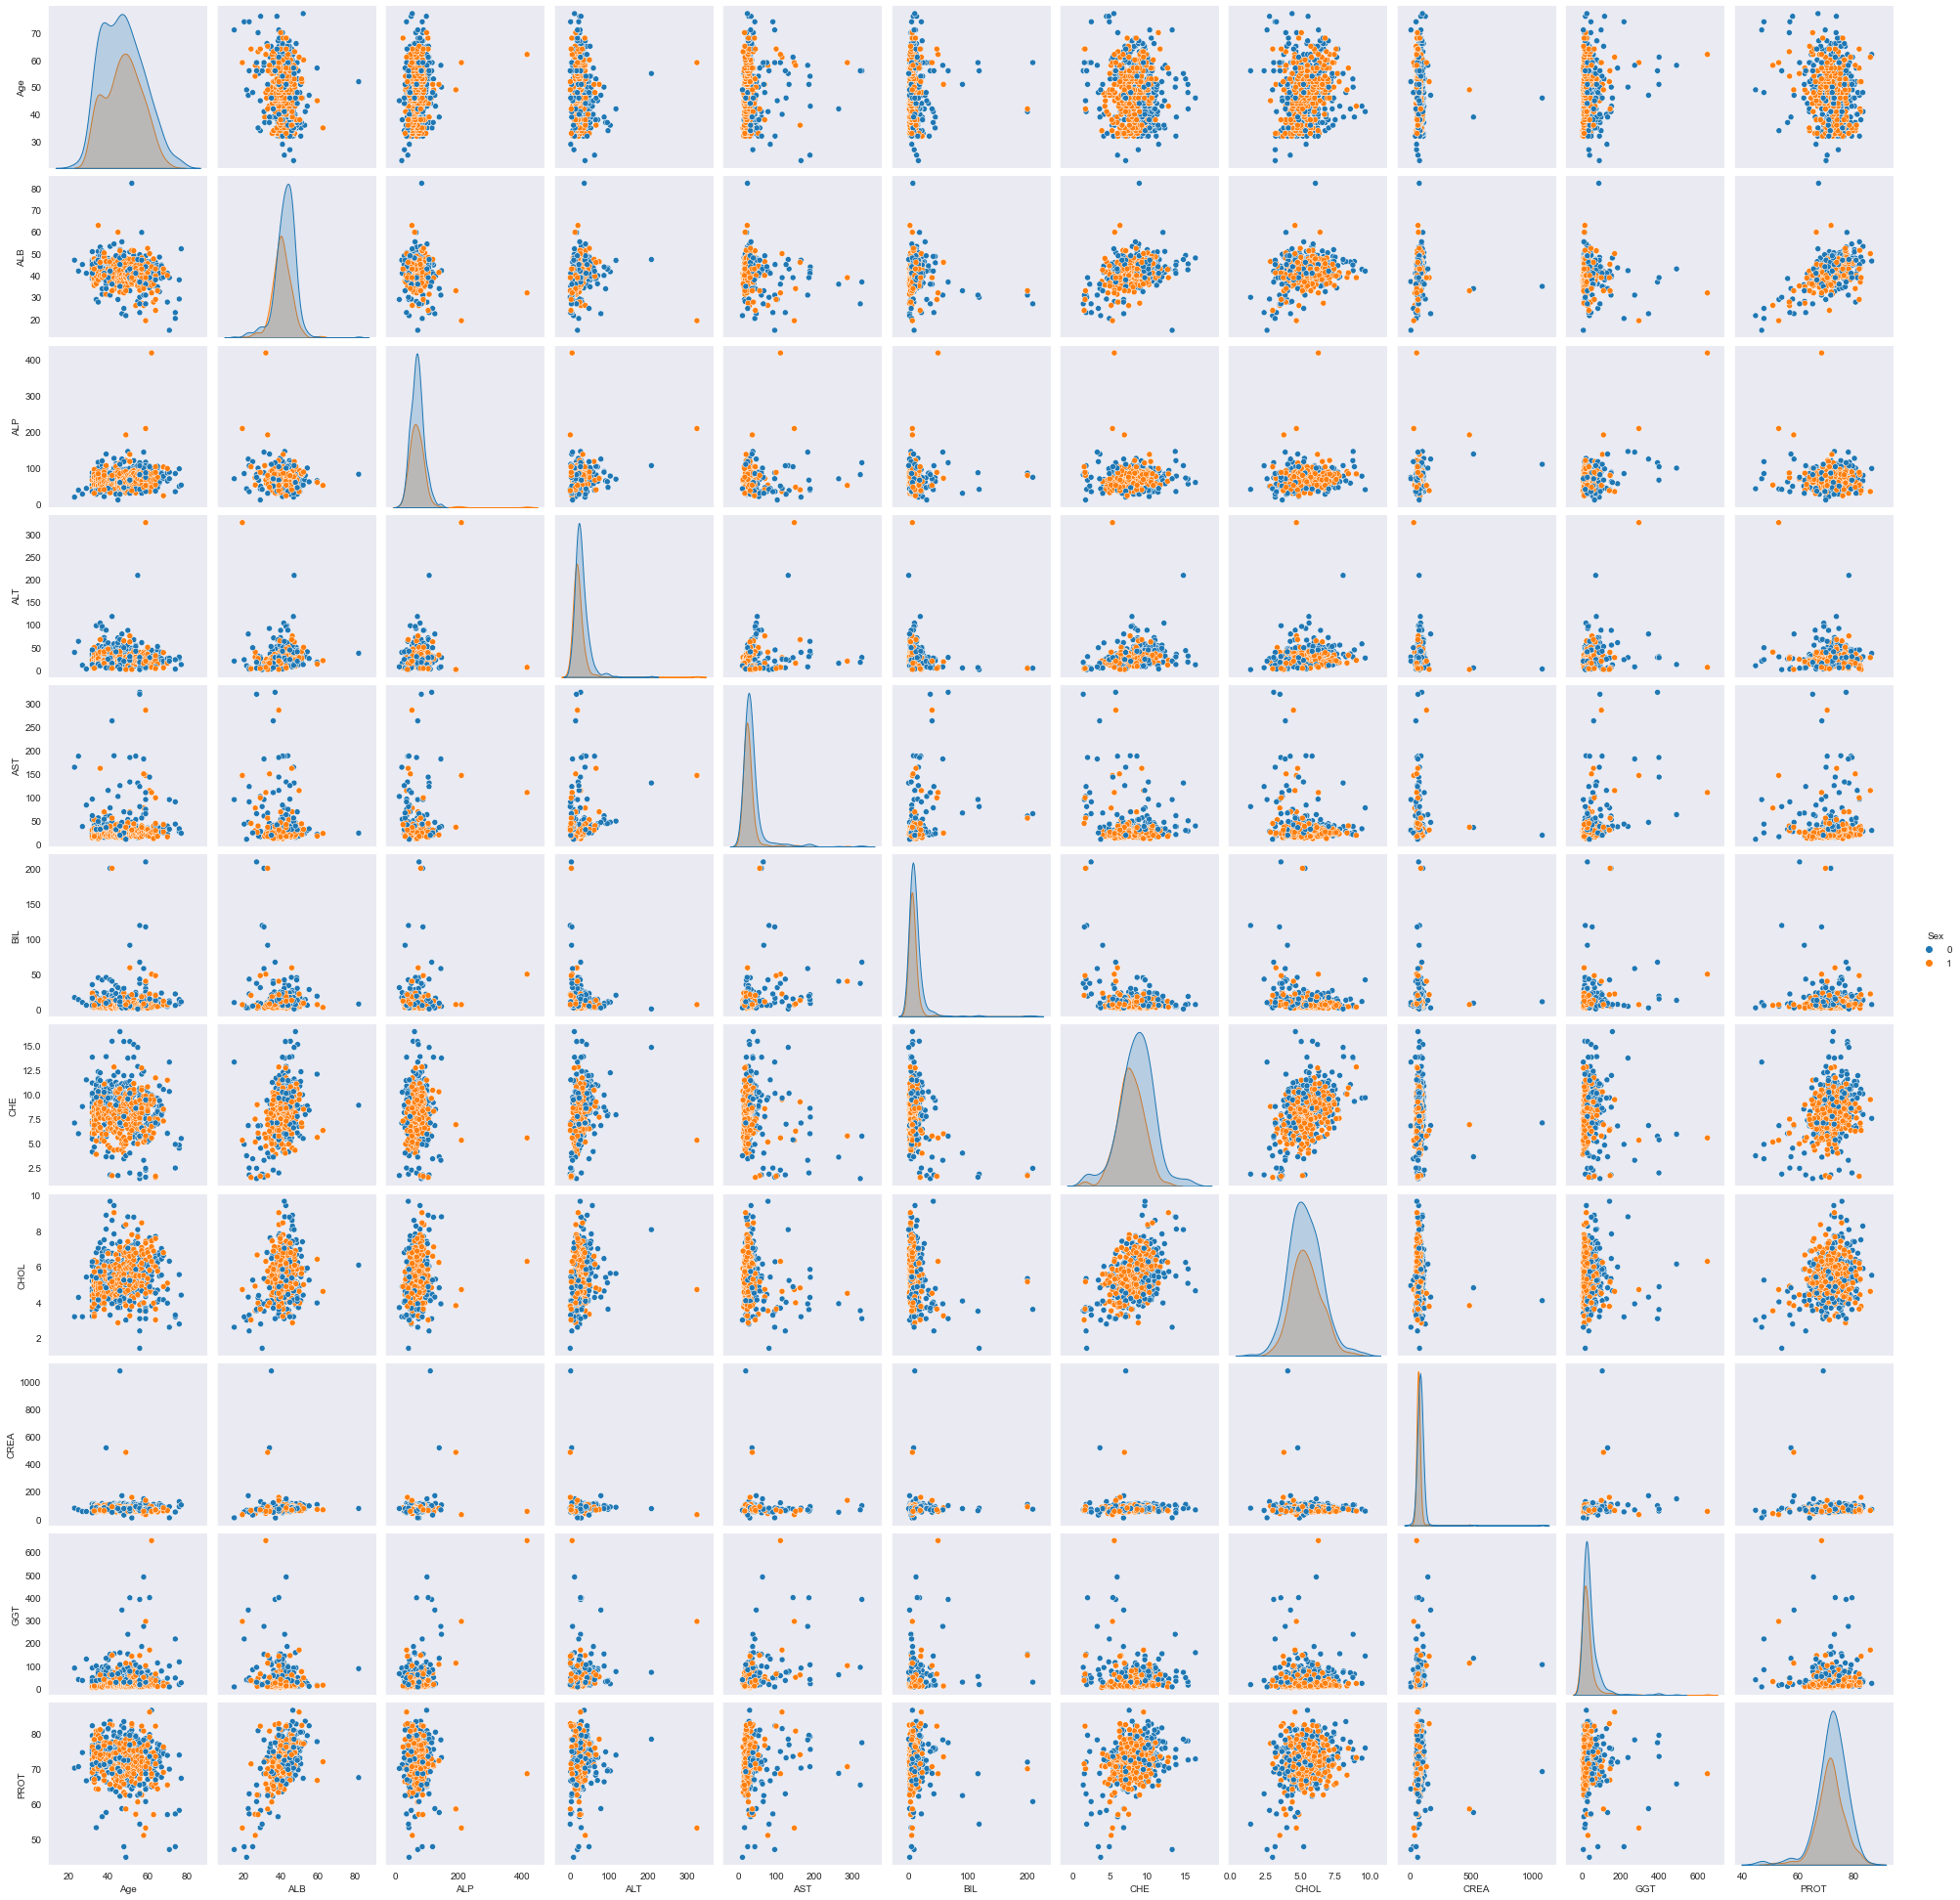

In [150]:
sns.set_style("dark")
sns.pairplot(data,hue="Sex")
plt.show()